# Credit Card Default-Case Study

In [1]:
from sklearn.manifold import TSNE
from keras.callbacks import Callback
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score



C:\Users\ARJUN_PC\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from pyclustering.cluster.optics import optics

In [3]:
#importing python libraries 

import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore') # to supress seaborn warnings
pd.options.display.max_columns = None # Remove pandas display column number limit
import xlrd
import csv


In [4]:
import pandas as pd
import pyodbc

server = 'ARJUN\SQLEXPRESS'
db = 'Data_Science'

# Create the connection
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' +server+';DATABASE='+db+';Trusted_Connection=yes')

# query db
sql = """

select * from CREDIT_CARD_DEFAULT_BEFORE

"""
fulldata = pd.read_sql(sql, conn)
# displaying the dataframe
fulldata.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


# Visualization and Cleaning Data

In [5]:
# Removing the extra header like X1,X2,X3...

fulldata.rename(columns={'default payment next month':'DEFAULTER','PAY_0':'PAY_1'},inplace=True)

In [6]:
fulldata.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [7]:
#for histogram visualizations

def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [8]:
#Checking null values in the dataframe

fulldata.isnull().values.any()

False

In [9]:
fulldata.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [10]:
#checking the range of values in Education and making it meaningful

fulldata.EDUCATION.value_counts()

2.0    14030
1.0    10585
3.0     4917
5.0      280
4.0      123
6.0       51
0.0       14
Name: EDUCATION, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000ABF5CF2978>,
      dtype=object)

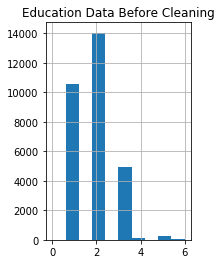

In [11]:
df =pd.DataFrame({'Education Data Before Cleaning':fulldata.EDUCATION})
df.hist(layout=(1,2))

In [12]:
fulldata.EDUCATION[fulldata.EDUCATION==0]=4
fulldata.EDUCATION[fulldata.EDUCATION==5]=4
fulldata.EDUCATION[fulldata.EDUCATION==6]=4

fulldata.EDUCATION.value_counts()

2.0    14030
1.0    10585
3.0     4917
4.0      468
Name: EDUCATION, dtype: int64

In [13]:
fulldata.EDUCATION.unique()

array([2., 1., 3., 4.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000ABF65DD198>,
      dtype=object)

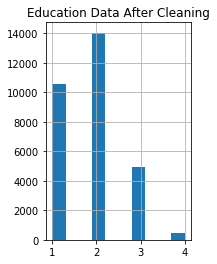

In [14]:
df =pd.DataFrame({'Education Data After Cleaning':fulldata.EDUCATION})
df.hist(layout=(1,2))

In [15]:
#checking the range of values in Marriage and making it meaningful
fulldata['MARRIAGE'].value_counts()

2.0    15964
1.0    13659
3.0      323
0.0       54
Name: MARRIAGE, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000ABF6695518>,
      dtype=object)

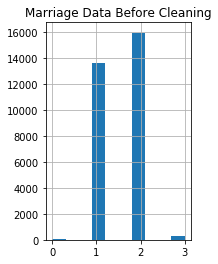

In [16]:
df =pd.DataFrame({'Marriage Data Before Cleaning':fulldata.MARRIAGE})
df.hist(layout=(1,2))

In [17]:
fulldata.MARRIAGE[fulldata.MARRIAGE==0]=3
fulldata.MARRIAGE.unique()
fulldata.MARRIAGE.value_counts()

2.0    15964
1.0    13659
3.0      377
Name: MARRIAGE, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000ABF66488D0>,
      dtype=object)

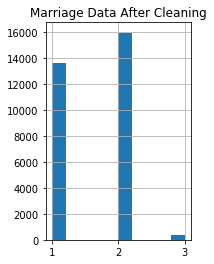

In [18]:
df =pd.DataFrame({'Marriage Data After Cleaning':fulldata.MARRIAGE})
df.hist(layout=(1,2))

In [19]:
fulldata[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.842267,1.557267
std,0.489129,0.744494,0.521405
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,4.000000,3.000000


In [20]:
#the column education,marriage,Sex is clean according to the problem statement

In [21]:
#renaming the header for Pay_0 to Pay_1

In [22]:
def fix_header(data):
    data.rename(columns={'PAY_0':'PAY_1'},inplace=True)
    return data
fulldata=fix_header(fulldata)

In [23]:
fulldata.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [24]:
fulldata[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


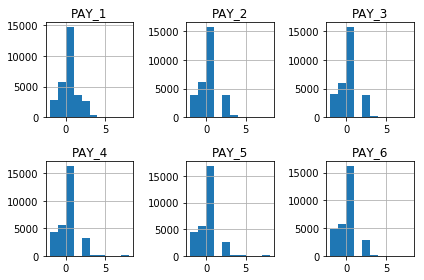

In [25]:
late = fulldata[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)


In [26]:
#making the values in PAY_number meaningful by removing the negative values in it

fil = (fulldata.PAY_1 ==-2) | (fulldata.PAY_1 ==-1) | (fulldata.PAY_1 ==0)
fulldata.loc[fil, 'PAY_1'] =0

fil = (fulldata.PAY_2 ==-2) | (fulldata.PAY_2 ==-1) | (fulldata.PAY_2 ==0)
fulldata.loc[fil, 'PAY_2'] =0

fil = (fulldata.PAY_3 ==-2) | (fulldata.PAY_3 == -1) | (fulldata.PAY_3 ==0)
fulldata.loc[fil, 'PAY_3'] =0


fil = (fulldata.PAY_4 ==-2) | (fulldata.PAY_4 ==-1) | (fulldata.PAY_4 ==0)
fulldata.loc[fil, 'PAY_4'] =0


fil = (fulldata.PAY_5 ==-2) | (fulldata.PAY_5 == -1) | (fulldata.PAY_5 ==0)
fulldata.loc[fil, 'PAY_5'] =0


fil = (fulldata.PAY_6 ==-2) | (fulldata.PAY_6== -1) | (fulldata.PAY_6 ==0)
fulldata.loc[fil, 'PAY_6'] =0




In [27]:
#Histogram visualization of PAY column

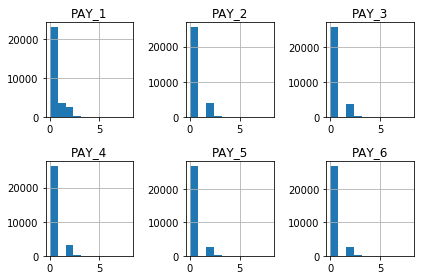

In [28]:
late = fulldata[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [29]:
#The above histogram represents payment month after cleaning

In [30]:
fulldata[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [31]:
# Finding outstanding amount trends

In [32]:
fulldata['out_bal_apr'] = ((fulldata['BILL_AMT5'] - (fulldata['BILL_AMT6'] - fulldata['PAY_AMT5'])))

fulldata['out_bal_may'] = (fulldata['out_bal_apr'] +(fulldata['BILL_AMT4'] - (fulldata['BILL_AMT5'] - fulldata['PAY_AMT4'])))

fulldata['out_bal_june'] = fulldata['out_bal_may']+(fulldata['BILL_AMT3'] - (fulldata['BILL_AMT4'] - fulldata['PAY_AMT3']))

fulldata['out_bal_july'] =fulldata['out_bal_june']+ (fulldata['BILL_AMT2'] - (fulldata['BILL_AMT3'] - fulldata['PAY_AMT2']))
fulldata['out_bal_aug'] =fulldata['out_bal_july']+ (fulldata['BILL_AMT1'] - (fulldata['BILL_AMT2'] - fulldata['PAY_AMT1']))


In [33]:
outstanding_apr=fulldata['out_bal_apr'].sum()
outstanding_may=fulldata['out_bal_may'].sum()
outstanding_june=fulldata['out_bal_june'].sum()
outstanding_july=fulldata['out_bal_july'].sum()
outstanding_aug=fulldata['out_bal_aug'].sum()


In [34]:
print(outstanding_apr)
print(outstanding_may)
print(outstanding_june)
print(outstanding_july)
print(outstanding_aug)

187170846.0
420499592.0
689776212.0
932388728.0
1163623815.0


[Text(0,0,'April'),
 Text(0,0,'May'),
 Text(0,0,'June'),
 Text(0,0,'July'),
 Text(0,0,'August')]

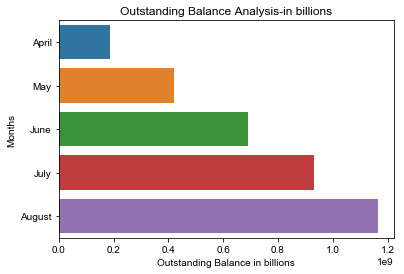

In [35]:
names  = ['April', 'May', 'June', 'July', 'August']
values = [outstanding_apr,outstanding_may,outstanding_june,outstanding_july,outstanding_aug]
plt.xlabel('Outstanding Balance in billions')
plt.ylabel('Months')
plt.title('Outstanding Balance Analysis-in billions')
sns.set_style("whitegrid")

ax = sns.barplot(x = values, y = names)
ax.set_yticklabels(['April', 'May', 'June', 'July', 'August'])

In [36]:
#Number of customers with outstanding amount 

In [37]:
fulldata['out_bucket']='0'
fulldata.out_bucket.value_counts()

0    30000
Name: out_bucket, dtype: int64

In [38]:
fulldata.loc[fulldata['out_bal_aug']<=0, 'out_bucket']=1
fulldata.loc[((fulldata['out_bal_aug']>0)&(fulldata['out_bal_aug']<1000)),'out_bucket']=2
fulldata.loc[((fulldata['out_bal_aug']>=1000)&(fulldata['out_bal_aug']<5000)),'out_bucket']=3
fulldata.loc[((fulldata['out_bal_aug']>=5000)&(fulldata['out_bal_aug']<10000)),'out_bucket']=4
fulldata.loc[((fulldata['out_bal_aug']>=10000)&(fulldata['out_bal_aug']<25000)),'out_bucket']=5
fulldata.loc[((fulldata['out_bal_aug']>=25000)&(fulldata['out_bal_aug']<50000)),'out_bucket']=6
fulldata.loc[((fulldata['out_bal_aug']>=50000)&(fulldata['out_bal_aug']<100000)),'out_bucket']=7
fulldata.loc[(fulldata['out_bal_aug']>=100000),'out_bucket']=8
fulldata.out_bucket.value_counts()

5    6126
6    5718
3    5642
7    4187
4    3652
8    2800
1    1210
2     665
Name: out_bucket, dtype: int64

In [39]:

import pandas as pd
out_names= fulldata['out_bucket'].value_counts(sort=False,ascending=False).keys().tolist()

out_counts = fulldata['out_bucket'].value_counts(sort=False, ascending=False).tolist()


[Text(0,0,'0'),
 Text(0,0,'1 to 1K'),
 Text(0,0,'1K to 5K'),
 Text(0,0,'5K to 10K'),
 Text(0,0,'10K to 25K'),
 Text(0,0,'25K to 50K'),
 Text(0,0,'50K to 100K'),
 Text(0,0,'>100K')]

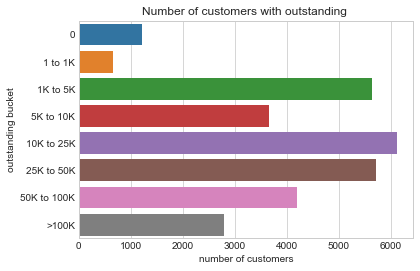

In [40]:
out_names_alias=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
out_counts_alias=[out_counts[0],out_counts[1],out_counts[2],out_counts[3],out_counts[4],out_counts[5],out_counts[6],out_counts[7]]
plt.xlabel('number of customers')
plt.ylabel('outstanding bucket')
plt.title('Number of customers with outstanding ')
ax = sns.barplot(x = out_counts_alias, y = out_names_alias)
ax.set_yticklabels(['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K'])

In [41]:
#Age of outstanding amount analysis

In [42]:
fulldata['AgeBin'] =0 #creates a column of 0
fulldata.loc[((fulldata['AGE'] > 20) & (fulldata['AGE'] < 30)) , 'AgeBin'] = 1
fulldata.loc[((fulldata['AGE'] >= 30) & (fulldata['AGE'] < 40)) , 'AgeBin'] = 2
fulldata.loc[((fulldata['AGE'] >= 40) & (fulldata['AGE'] < 50)) , 'AgeBin'] = 3
fulldata.loc[((fulldata['AGE'] >= 50) & (fulldata['AGE'] < 60)) , 'AgeBin'] = 4
fulldata.loc[((fulldata['AGE'] >= 60) & (fulldata['AGE'] < 70)) , 'AgeBin'] = 5
fulldata.loc[((fulldata['AGE'] >= 70) & (fulldata['AGE'] < 81)) , 'AgeBin'] = 6


In [43]:

out_names_age= fulldata['AgeBin'].value_counts(sort=False,ascending=False).keys().tolist()

out_counts_age = fulldata['AgeBin'].value_counts(sort=False, ascending=False).tolist()


[Text(0,0,'20 to 30'),
 Text(0,0,'30 to 40'),
 Text(0,0,'40 to 50'),
 Text(0,0,'50 to 60'),
 Text(0,0,'60 to 70'),
 Text(0,0,'70 to 81')]

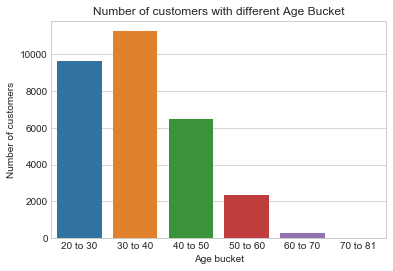

In [44]:
out_names_age_alias=['20 to 30','30 to 40','40 to 50','50 to 60','60 to 70','70 to 81']
out_counts_age_alias=[out_counts_age[0],out_counts_age[1],out_counts_age[2],out_counts_age[3],out_counts_age[4],out_counts_age[5]]
plt.xlabel('Age bucket')
plt.ylabel('Number of customers')
plt.title('Number of customers with different Age Bucket')
ax = sns.barplot(x = out_names_age_alias, y = out_counts_age_alias)
ax.set_xticklabels(['20 to 30','30 to 40','40 to 50','50 to 60','60 to 70','70 to 81'])

In [45]:
def corr_2_cols(Col1, Col2):
    res = fulldata.groupby([Col1, Col2]).size().unstack()
    #res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [46]:
#finding correlation between outstanding bucket and agebin
corr_2_cols('out_bucket','AgeBin')

AgeBin,1,2,3,4,5,6
out_bucket,,,,,,
1,325.0,485.0,276.0,93.0,28.0,3.0
2,223.0,274.0,125.0,37.0,6.0,NaN
3,1934.0,1886.0,1231.0,525.0,63.0,3.0
4,1288.0,1308.0,734.0,284.0,37.0,1.0
5,2134.0,2288.0,1232.0,413.0,54.0,5.0
6,1900.0,2110.0,1205.0,440.0,59.0,4.0
7,1208.0,1691.0,927.0,317.0,37.0,7.0
8,606.0,1196.0,734.0,232.0,30.0,2.0


Text(0.5,1,'Heatmap of Outstanding Balance and AgeBin')

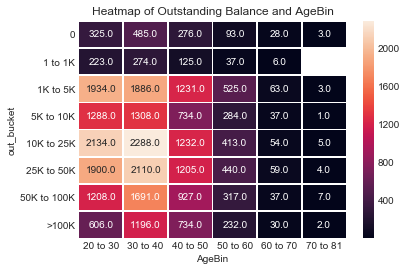

In [47]:
lab=['20 to 30','30 to 40','40 to 50','50 to 60','60 to 70','70 to 81']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'AgeBin')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2,linewidths=.5)
r.set_title("Heatmap of Outstanding Balance and AgeBin")

In [48]:
# Based on our analysis,more clients between age group of 30 to 40 and 20 to 30 have an outstanding balance of range 10 K to 50K

In [49]:
#finding relationship between in outstanding amount / trend with respect to age,education, marriage, credit limit

In [50]:
corr_2_cols('out_bucket','EDUCATION')

EDUCATION,1.0,2.0,3.0,4.0
out_bucket,,,,
1,571,441,183,15
2,263,307,88,7
3,1793,2745,1063,41
4,1219,1730,656,47
5,2183,2896,961,86
6,1858,2806,959,95
7,1534,1933,643,77
8,1164,1172,364,100


Text(0.5,1,'Heatmap of Outstanding Balance and Education')

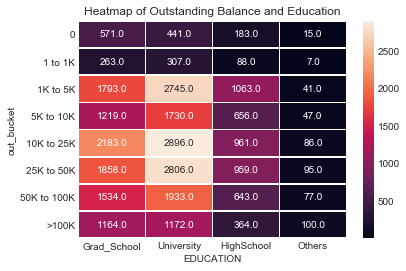

In [51]:
lab=['Grad_School','University','HighSchool','Others']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'EDUCATION')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2, linewidths=.8)
r.set_title("Heatmap of Outstanding Balance and Education")

In [52]:
#Client having an university degree has more number of outstanding balance. 

Text(0.5,1,'Heatmap of Outstanding Balance and Marriage')

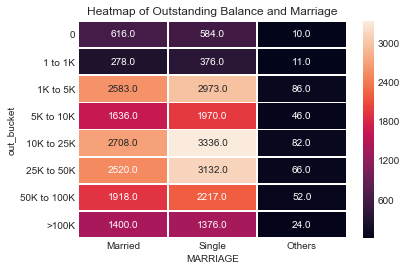

In [53]:
lab=['Married','Single','Others']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'MARRIAGE')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2, linewidths=.8)
r.set_title("Heatmap of Outstanding Balance and Marriage")

In [54]:
#Client whose is single tends to have more number of outstanding balance

In [55]:
df=pd.DataFrame(fulldata,columns=['out_bal_aug','AGE','EDUCATION','MARRIAGE','LIMIT_BAL'])
df.head()

,out_bal_aug,AGE,EDUCATION,MARRIAGE,LIMIT_BAL
0,4602.0,24.0,2.0,1.0,20000.0
1,2421.0,26.0,2.0,2.0,120000.0
2,19708.0,34.0,2.0,2.0,90000.0
3,24831.0,37.0,2.0,1.0,50000.0
4,47856.0,57.0,2.0,1.0,50000.0


In [56]:
fulldata['gender_marital']=0
fulldata.loc[((fulldata.SEX == 1) & (fulldata.MARRIAGE == 1)) , 'gender_marital'] = 1 #married man
fulldata.loc[((fulldata.SEX == 1) & (fulldata.MARRIAGE == 2)) , 'gender_marital'] = 2 #single man
fulldata.loc[((fulldata.SEX == 1) & (fulldata.MARRIAGE == 3)) , 'gender_marital'] = 3 #divorced man
fulldata.loc[((fulldata.SEX == 2) & (fulldata.MARRIAGE == 1)) , 'gender_marital'] = 4 #married women
fulldata.loc[((fulldata.SEX == 2) & (fulldata.MARRIAGE == 2)) , 'gender_marital'] = 5 #single women
fulldata.loc[((fulldata.SEX == 2) & (fulldata.MARRIAGE == 3)) , 'gender_marital'] = 6 #divorced women

In [57]:
corr_2_cols('out_bucket','gender_marital')

gender_marital,1,2,3,4,5,6
out_bucket,,,,,,
1,225,237,3,391,347,7
2,86,128,4,192,248,7
3,1025,1302,34,1558,1671,52
4,600,787,16,1036,1183,30
5,955,1280,34,1753,2056,48
6,954,1278,27,1566,1854,39
7,725,920,21,1193,1297,31
8,620,621,6,780,755,18


Text(0.5,1,'Heatmap of Outstanding Balance and gender_marital')

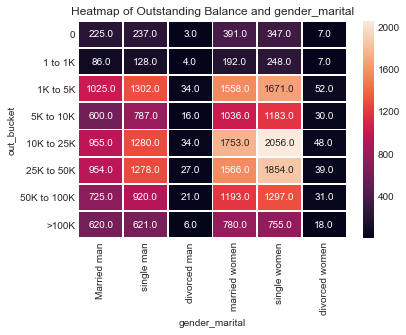

In [58]:
lab=['Married man','single man','divorced man','married women','single women','divorced women']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'gender_marital')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2, linewidths=.8)
r.set_title("Heatmap of Outstanding Balance and gender_marital")

In [59]:
#Clients who are single women has more number of outstanding balance

In [60]:
fulldata['gender_agebin'] = 0
fulldata.loc[((fulldata.SEX == 1) & (fulldata.AgeBin == 1)) , 'gender_agebin'] = 1 #man in 20's
fulldata.loc[((fulldata.SEX == 1) & (fulldata.AgeBin == 2)) , 'gender_agebin'] = 2 #man in 30's
fulldata.loc[((fulldata.SEX == 1) & (fulldata.AgeBin == 3)) , 'gender_agebin'] = 3 #man in 40's
fulldata.loc[((fulldata.SEX == 1) & (fulldata.AgeBin == 4)) , 'gender_agebin'] = 4 #man in 50's
fulldata.loc[((fulldata.SEX == 1) & (fulldata.AgeBin == 5)) , 'gender_agebin'] = 5 #man in 60's and above
fulldata.loc[((fulldata.SEX == 2) & (fulldata.AgeBin == 1)) , 'gender_agebin'] = 6 #woman in 20's
fulldata.loc[((fulldata.SEX == 2) & (fulldata.AgeBin == 2)) , 'gender_agebin'] = 7 #woman in 30's
fulldata.loc[((fulldata.SEX == 2) & (fulldata.AgeBin == 3)) , 'gender_agebin'] = 8 #woman in 40's
fulldata.loc[((fulldata.SEX == 2) & (fulldata.AgeBin == 4)) , 'gender_agebin'] = 9 #woman in 50's
fulldata.loc[((fulldata.SEX == 2) & (fulldata.AgeBin == 5)) , 'gender_agebin'] = 10 #woman in 60's and above
corr_2_cols('out_bucket', 'gender_agebin')

gender_agebin,0,1,2,3,4,5,6,7,8,9,10
out_bucket,,,,,,,,,,,
1,3.0,134.0,174.0,99.0,44.0,12.0,191.0,311.0,177.0,49.0,16.0
2,NaN,69.0,91.0,49.0,9.0,NaN,154.0,183.0,76.0,28.0,6.0
3,3.0,747.0,802.0,529.0,243.0,38.0,1187.0,1084.0,702.0,282.0,25.0
4,1.0,420.0,530.0,317.0,120.0,15.0,868.0,778.0,417.0,164.0,22.0
5,5.0,664.0,874.0,515.0,189.0,25.0,1470.0,1414.0,717.0,224.0,29.0
6,4.0,622.0,874.0,512.0,219.0,31.0,1278.0,1236.0,693.0,221.0,28.0
7,7.0,406.0,660.0,417.0,157.0,21.0,802.0,1031.0,510.0,160.0,16.0
8,2.0,219.0,560.0,333.0,111.0,24.0,387.0,636.0,401.0,121.0,6.0


Text(0.5,1,'Heatmap of Outstanding Balance and gender_agebin')

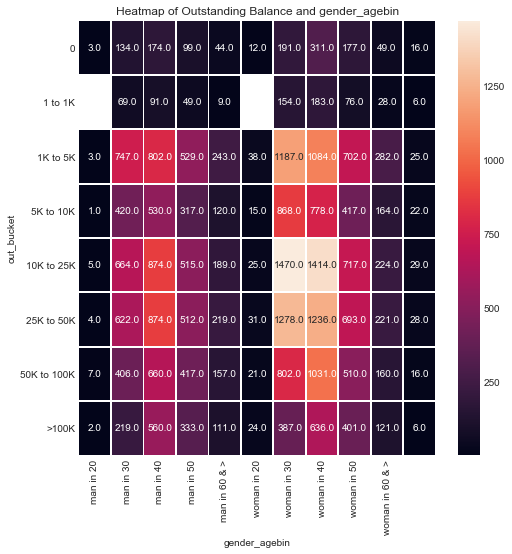

In [61]:
f,ax = plt.subplots(figsize=(8, 8))

lab=['man in 20','man in 30','man in 40','man in 50','man in 60 & >','woman in 20','woman in 30','woman in 40','woman in 50','woman in 60 & >']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'gender_agebin')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2, linewidths=.8,ax=ax)
r.set_title("Heatmap of Outstanding Balance and gender_agebin")

In [62]:
#Woman Clients with the age group of 20 to 30 tends to have an more number of outstanding balance of range 10K to 25K

Text(0.5,1,'Heatmap of Relation between Age,Educ,Marriage,Balance')

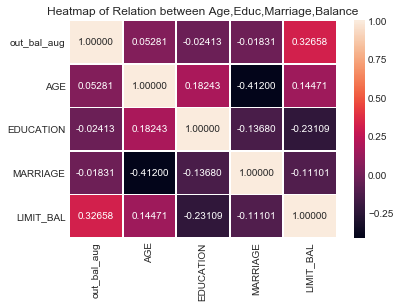

In [63]:
cor = df.corr()
r=sns.heatmap(cor,annot=True,fmt="0.5f",xticklabels=cor.columns.values,yticklabels=cor.columns.values, linewidths=.8)
r.set_title("Heatmap of Relation between Age,Educ,Marriage,Balance")

In [64]:
#The correlation between outstanding balance and Limit Balance is highly co-related(0.32658) compared to other columns

In [65]:
#finding the closeness of the use of credit card by the customers

fulldata['Closeness_6'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT6) / fulldata.LIMIT_BAL
fulldata['Closeness_5'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT5) / fulldata.LIMIT_BAL
fulldata['Closeness_4'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT4) / fulldata.LIMIT_BAL
fulldata['Closeness_3'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT3) / fulldata.LIMIT_BAL
fulldata['Closeness_2'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT2) / fulldata.LIMIT_BAL
fulldata['Closeness_1'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT1) / fulldata.LIMIT_BAL
fulldata[['Closeness_6', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2',
   'Closeness_1', 'DEFAULTER']].sample(20)

,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,DEFAULTER
6346,0.995125,0.990250,0.995125,0.995125,0.995125,0.995125,0.0
20538,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,1.0
7169,1.000000,1.000000,1.000000,1.000000,1.000000,0.480000,1.0
440,0.748320,0.747100,0.966100,0.992000,0.993000,0.993000,0.0
6516,0.934000,0.934000,0.834000,1.000000,0.720300,0.678700,0.0
16549,0.936849,0.821559,0.812351,0.863700,0.845518,0.992154,0.0
8490,1.000000,0.372000,0.384600,0.384600,0.354300,0.520300,0.0
14915,0.290371,0.211886,0.017557,0.018814,0.002557,-0.008871,0.0
1253,0.673700,0.489900,0.505040,0.513230,0.530780,0.550470,0.0
2031,0.994272,0.994284,0.998700,0.998700,0.998700,0.998700,0.0


In [66]:
fulldata['Client_6'] = 1
fulldata['Client_5'] = 1
fulldata['Client_4'] = 1
fulldata['Client_3'] = 1
fulldata['Client_2'] = 1
fulldata['Client_1'] = 1
fulldata.loc[((fulldata.PAY_6 == 0) & (fulldata.BILL_AMT6 == 0) & (fulldata.PAY_AMT6 == 0)) , 'Client_6'] = 0
fulldata.loc[((fulldata.PAY_5 == 0) & (fulldata.BILL_AMT5 == 0) & (fulldata.PAY_AMT5 == 0)) , 'Client_5'] = 0
fulldata.loc[((fulldata.PAY_4 == 0) & (fulldata.BILL_AMT4 == 0) & (fulldata.PAY_AMT4 == 0)) , 'Client_4'] = 0
fulldata.loc[((fulldata.PAY_3 == 0) & (fulldata.BILL_AMT3 == 0) & (fulldata.PAY_AMT3 == 0)) , 'Client_3'] = 0
fulldata.loc[((fulldata.PAY_2 == 0) & (fulldata.BILL_AMT2 == 0) & (fulldata.PAY_AMT2 == 0)) , 'Client_2'] = 0
fulldata.loc[((fulldata.PAY_1 == 0) & (fulldata.BILL_AMT1 == 0) & (fulldata.PAY_AMT1 == 0)) , 'Client_1'] = 0
pd.Series([fulldata[fulldata.Client_6 == 1].DEFAULTER.count(),
          fulldata[fulldata.Client_5 == 1].DEFAULTER.count(),
          fulldata[fulldata.Client_4 == 1].DEFAULTER.count(),
          fulldata[fulldata.Client_3 == 1].DEFAULTER.count(),
          fulldata[fulldata.Client_2 == 1].DEFAULTER.count(),
          fulldata[fulldata.Client_1 == 1].DEFAULTER.count()], [6,5,4,3,2,1])

6    26700
5    27247
4    27572
3    27810
2    28183
1    29477
dtype: int64

In [67]:
#finding the average expense by the customer

In [68]:
fulldata['Avg_exp_5'] = ((fulldata['BILL_AMT5'] - (fulldata['BILL_AMT6'] - fulldata['PAY_AMT5']))) / fulldata['LIMIT_BAL']
fulldata['Avg_exp_4'] = (((fulldata['BILL_AMT5'] - (fulldata['BILL_AMT6'] - fulldata['PAY_AMT5'])) +
                 (fulldata['BILL_AMT4'] - (fulldata['BILL_AMT5'] - fulldata['PAY_AMT4']))) / 2) / fulldata['LIMIT_BAL']
fulldata['Avg_exp_3'] = (((fulldata['BILL_AMT5'] - (fulldata['BILL_AMT6'] - fulldata['PAY_AMT5'])) +
                 (fulldata['BILL_AMT4'] - (fulldata['BILL_AMT5'] - fulldata['PAY_AMT4'])) +
                 (fulldata['BILL_AMT3'] - (fulldata['BILL_AMT4'] - fulldata['PAY_AMT3']))) / 3) / fulldata['LIMIT_BAL']
fulldata['Avg_exp_2'] = (((fulldata['BILL_AMT5'] - (fulldata['BILL_AMT6'] - fulldata['PAY_AMT5'])) +
                 (fulldata['BILL_AMT4'] - (fulldata['BILL_AMT5'] - fulldata['PAY_AMT4'])) +
                 (fulldata['BILL_AMT3'] - (fulldata['BILL_AMT4'] - fulldata['PAY_AMT3'])) +
                 (fulldata['BILL_AMT2'] - (fulldata['BILL_AMT3'] - fulldata['PAY_AMT2']))) / 4) / fulldata['LIMIT_BAL']


In [69]:
fulldata['Avg_exp_1'] = (((fulldata['BILL_AMT5'] - (fulldata['BILL_AMT6'] - fulldata['PAY_AMT5'])) +
                 (fulldata['BILL_AMT4'] - (fulldata['BILL_AMT5'] - fulldata['PAY_AMT4'])) +
                 (fulldata['BILL_AMT3'] - (fulldata['BILL_AMT4'] - fulldata['PAY_AMT3'])) +
                 (fulldata['BILL_AMT2'] - (fulldata['BILL_AMT3'] - fulldata['PAY_AMT2'])) +
                 (fulldata['BILL_AMT1'] - (fulldata['BILL_AMT2'] - fulldata['PAY_AMT1']))) / 5) / fulldata['LIMIT_BAL']
fulldata[['LIMIT_BAL', 'Avg_exp_5', 'BILL_AMT5', 'Avg_exp_4', 'BILL_AMT4','Avg_exp_3', 'BILL_AMT3',
    'Avg_exp_2', 'BILL_AMT2', 'Avg_exp_1', 'BILL_AMT1', 'DEFAULTER']].sample(20)

,LIMIT_BAL,Avg_exp_5,BILL_AMT5,Avg_exp_4,BILL_AMT4,Avg_exp_3,BILL_AMT3,Avg_exp_2,BILL_AMT2,Avg_exp_1,BILL_AMT1,DEFAULTER
3878,20000.0,0.000000,1050.0,0.000000,1050.0,0.000000,1050.0,0.000000,1050.0,0.000000,1050.0,1.0
26201,20000.0,0.043950,19087.0,0.055225,19917.0,0.044017,18849.0,0.047475,18506.0,0.052440,18652.0,0.0
4447,90000.0,0.014678,85868.0,0.037406,91280.0,0.033052,86671.0,0.040014,92152.0,0.037236,90603.0,0.0
29746,180000.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
16532,140000.0,0.030493,139879.0,0.043964,142020.0,0.043452,142460.0,0.038712,139889.0,0.034127,136899.0,0.0
19723,180000.0,0.014450,152219.0,0.014156,142714.0,0.016544,146552.0,0.017739,144790.0,0.018340,142024.0,1.0
1470,100000.0,0.004310,21794.0,0.004130,18901.0,0.003400,15807.0,0.004060,12723.0,0.004236,10529.0,0.0
3745,290000.0,0.005800,1682.0,0.007779,2830.0,0.007779,2256.0,0.008904,3555.0,0.008352,1757.0,0.0
15133,50000.0,0.057620,29172.0,0.204860,45624.0,0.173380,51145.0,0.134155,47469.0,0.110404,46239.0,1.0
12595,20000.0,0.330850,13840.0,0.264975,17538.0,0.183600,16749.0,0.194400,19868.0,0.170530,19473.0,0.0


In [70]:
fulldata.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER,out_bal_apr,out_bal_may,out_bal_june,out_bal_july,out_bal_aug,out_bucket,AgeBin,gender_marital,gender_agebin,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,Client_6,Client_5,Client_4,Client_3,Client_2,Client_1,Avg_exp_5,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,0.0,0.0,0.0,0.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,689.0,3791.0,4602.0,3,1,4,6,1.000000,1.000000,1.000000,0.965550,0.844900,0.804350,0,0,0,1,1,1,0.000000,0.000000,0.011483,0.047387,0.046020
1,2.0,120000.0,2.0,2.0,2.0,26.0,0.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,194.0,1011.0,1421.0,1464.0,2421.0,3,1,5,6,0.972825,0.971208,0.972733,0.977650,0.985625,0.977650,1,1,1,1,1,1,0.001617,0.004213,0.003947,0.003050,0.004035
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,399.0,782.0,1010.0,2978.0,19708.0,5,2,5,7,0.827233,0.833911,0.840767,0.849344,0.844144,0.675122,1,1,1,1,1,1,0.004433,0.004344,0.003741,0.008272,0.043796
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,481.0,936.0,23113.0,24074.0,24831.0,5,2,4,7,0.409060,0.420820,0.433720,0.014180,0.035340,0.060200,1,1,1,1,1,1,0.009620,0.009360,0.154087,0.120370,0.099324
4,5.0,50000.0,1.0,2.0,1.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,704.0,11498.0,36393.0,42909.0,47856.0,6,4,1,4,0.617380,0.617080,0.581200,0.283300,0.886600,0.827660,1,1,1,1,1,1,0.014080,0.114980,0.242620,0.214545,0.191424


In [70]:
#exporting the data in excel for Tableau After data analysis
writer_orig = pd.ExcelWriter('After_cleaning_data.xlsx', engine='xlsxwriter')
fulldata.to_excel(writer_orig, index=False, sheet_name='Data')
writer_orig.save()

# Building Model to find defaulters

In [71]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
features = ['LIMIT_BAL','SEX','AGE', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'out_bucket',
            'gender_marital', 'AgeBin', 'gender_agebin', 'Closeness_5','out_bal_apr','out_bal_may','out_bal_june','out_bal_july','out_bal_aug',
            'Closeness_4', 'Closeness_3', 'Closeness_2','Closeness_1']
y = fulldata['DEFAULTER'].copy() # target
X = fulldata[features].copy()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [72]:
df_train=x_train.join(y_train)
df_train.head()

,LIMIT_BAL,SEX,AGE,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,out_bucket,gender_marital,AgeBin,gender_agebin,Closeness_5,out_bal_apr,out_bal_may,out_bal_june,out_bal_july,out_bal_aug,Closeness_4,Closeness_3,Closeness_2,Closeness_1,DEFAULTER
21753,430000.0,2.0,29.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,111409.0,114071.0,116749.0,118319.0,121351.0,125225.0,6000.0,6000.0,5000.0,5000.0,6000.0,5000.0,5,5,1,6,0.717788,2126.0,4094.0,7524.0,10846.0,14184.0,0.724840,0.728491,0.734719,0.740909,0.0
251,30000.0,1.0,28.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,29242.0,29507.0,29155.0,25255.0,22001.0,0.0,5006.0,1244.0,851.0,955.0,0.0,0.0,6,2,1,1,0.266633,22001.0,26210.0,30961.0,32557.0,37298.0,0.158167,0.028167,0.016433,0.025267,0.0
22941,200000.0,1.0,29.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,9228.0,7532.0,7246.0,3506.0,2376.0,123687.0,2100.0,3320.0,0.0,2400.0,127187.0,2187.0,5,2,1,1,0.988120,5876.0,9406.0,13146.0,16752.0,20548.0,0.982470,0.963770,0.962340,0.953860,0.0
618,60000.0,1.0,25.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,58839.0,53235.0,38533.0,39639.0,39619.0,39140.0,2018.0,1900.0,2000.0,1500.0,1900.0,2000.0,6,2,1,1,0.339683,2379.0,3899.0,4793.0,21395.0,29017.0,0.339350,0.357783,0.112750,0.019350,0.0
17090,150000.0,1.0,43.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,105416.0,106773.0,106500.0,104670.0,55442.0,55936.0,5800.0,4648.0,2000.0,2889.0,2700.0,94000.0,7,1,3,3,0.630387,2206.0,54323.0,58153.0,63074.0,67517.0,0.302200,0.290000,0.288180,0.297227,0.0


In [73]:
df_test=x_test.join(y_test)
df_test.head()

,LIMIT_BAL,SEX,AGE,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,out_bucket,gender_marital,AgeBin,gender_agebin,Closeness_5,out_bal_apr,out_bal_may,out_bal_june,out_bal_july,out_bal_aug,Closeness_4,Closeness_3,Closeness_2,Closeness_1,DEFAULTER
2308,30000.0,1.0,25.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,8864.0,10062.0,11581.0,12580.0,13716.0,14828.0,1500.0,2000.0,1500.0,1500.0,1500.0,2000.0,3,2,1,1,0.542800,388.0,752.0,1253.0,1734.0,2036.0,0.580667,0.613967,0.664600,0.704533,0.0
22404,180000.0,2.0,33.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,165839.0,153828.0,158050.0,149023.0,135798.0,112666.0,20064.0,30032.0,20027.0,40000.0,10000.0,0.0,8,4,2,7,0.245567,33132.0,86357.0,115411.0,141221.0,173296.0,0.172094,0.121944,0.145400,0.078672,0.0
23397,180000.0,1.0,30.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,3229.0,0.0,6709.0,6366.0,1950.0,1931.0,0.0,6709.0,0.0,1950.0,1931.0,16486.0,5,2,2,2,0.989167,1950.0,8316.0,8659.0,8659.0,11888.0,0.964633,0.962728,1.000000,0.982061,0.0
25058,260000.0,2.0,41.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,157551.0,160759.0,351026.0,170671.0,169689.0,159066.0,7312.0,18934.0,23.0,3729.0,4226.0,514.0,6,4,3,8,0.347350,14849.0,19560.0,199938.0,28605.0,32709.0,0.343573,-0.350100,0.381696,0.394035,0.0
2664,50000.0,2.0,36.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,94228.0,47635.0,42361.0,19574.0,20295.0,19439.0,2000.0,1500.0,1000.0,1800.0,0.0,1000.0,7,5,2,7,0.594100,856.0,1935.0,25722.0,32496.0,81089.0,0.608520,0.152780,0.047300,-0.884560,1.0


In [74]:
df_majority = df_train[df_train.DEFAULTER==0]
df_minority = df_train[df_train.DEFAULTER==1]

print(df_majority.DEFAULTER.count())
print("-----------")
print(df_minority.DEFAULTER.count())
print("-----------")
print(df_train.DEFAULTER.value_counts())

18701
-----------
5299
-----------
0.0    18701
1.0     5299
Name: DEFAULTER, dtype: int64


In [75]:
#UPSAMPLING DATA

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=18701,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.DEFAULTER.value_counts()

1.0    18701
0.0    18701
Name: DEFAULTER, dtype: int64

In [76]:
#DOWNSAMPLING DATA
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5299,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.DEFAULTER.value_counts()

1.0    5299
0.0    5299
Name: DEFAULTER, dtype: int64

In [77]:
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.svm as svm
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn import preprocessing,svm,neighbors
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from subprocess import check_output

In [78]:
x = df_train.drop(['DEFAULTER'],axis = 1)
y = df_train.DEFAULTER

# rescale the metrics to the same mean and standard deviation
scaler = preprocessing.StandardScaler()
x = scaler.fit(x).transform(x)

# Further divide the train data into train test split 70% & 30% respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=2)

In [79]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16800, 37)
(7200, 37)
(16800,)
(7200,)


In [80]:
from sklearn import tree
clfs = {
'LogisticRegression' : LogisticRegression(),
'GaussianNB': GaussianNB(),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(),
'KNeighborsClassifier': KNeighborsClassifier(),
'GradientBoosting': GradientBoostingClassifier(),
}


In [81]:
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_score = clf.score(x_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,LogisticRegression,0.683333,0.335220,0.449789,0.818889
1,GaussianNB,0.465402,0.571069,0.512849,0.760417
2,RandomForest,0.625298,0.329560,0.431631,0.808333
3,DecisionTreeClassifier,0.380779,0.393711,0.387137,0.724722
4,SVM,0.675030,0.355346,0.465595,0.819861
5,KNeighborsClassifier,0.534702,0.344025,0.418676,0.789028
6,GradientBoosting,0.660440,0.377987,0.480800,0.819722


In [82]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [83]:
def gridsearch(model, params,x_train, x_test, y_train, y_test, kfold):
    gs = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=kfold)
    gs.fit(x_train, y_train)
    print ('Best params: ', gs.best_params_)
    print ('Best AUC on Train set: ', gs.best_score_)
    print ('Best AUC on Test set: ', gs.score(x_test, y_test))

# Function to generate confusion matrix
def confmat(pred, y_test):
    conmat = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    conf = pd.DataFrame(conmat, index=['Defaulter', 'Not Defaulter'],
                             columns=['Predicted Defaulter', 'Predicted Not Defaulter'])
    print (conf)

# Function to plot roc curve
def roc(prob, y_test):
    y_score = prob
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])
    plt.figure(figsize=[7,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive rate', fontsize=15)
    plt.ylabel('True Positive rate', fontsize=15)
    plt.title('ROC curve for Credit Default', fontsize=16)
    plt.legend(loc='Lower Right')
    plt.show()
    
def model(md, x_train, y_train,x_test, y_test):
    md.fit(x_train, y_train)
    pred = md.predict(x_test)
    prob = md.predict_proba(x_test)[:,1]
    print (' ') 
    print ('Accuracy on Train set: ', md.score(x_train, y_train))
    print ('Accuracy on Test set: ', md.score(x_test, y_test))
    print (' ')
    print(classification_report(y_test, pred))
    print (' ')
    print ('Confusion Matrix')
    confmat(pred, y_test)
    print('ACCURACY: ', accuracy_score(y_test, pred),' or ',round(accuracy_score(y_test, pred)*100,2),'%')
    threshold = 0.5
    y_train_pred = md.predict_proba(x_train)[:,1]
    

    fig,ax = plt.subplots(1,2)
    fig.set_size_inches(15,5)

    plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
    plot_cm(ax[1],  y_test, prob,   [0,1], 'Confusion matrix (TEST)', threshold)
    roc(prob, y_test)
  
    return md

In [84]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix
def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

In [85]:
gb = GradientBoostingClassifier()
gb_params = {'n_estimators': [100,200,300],'learning_rate' : [0.01, 0.02, 0.05, 0.1]}

In [86]:
#building ROC curve

In [87]:
#true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
#true negatives (TN): We predicted no, and they don't have the disease.
#false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
#false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")



 
Accuracy on Train set:  0.876547619047619
Accuracy on Test set:  0.8166666666666667
 
             precision    recall  f1-score   support

        0.0       0.84      0.94      0.89      5610
        1.0       0.65      0.37      0.47      1590

avg / total       0.80      0.82      0.80      7200

 
Confusion Matrix
               Predicted Defaulter  Predicted Not Defaulter
Defaulter                      584                     1006
Not Defaulter                  314                     5296
ACCURACY:  0.8166666666666667  or  81.67 %


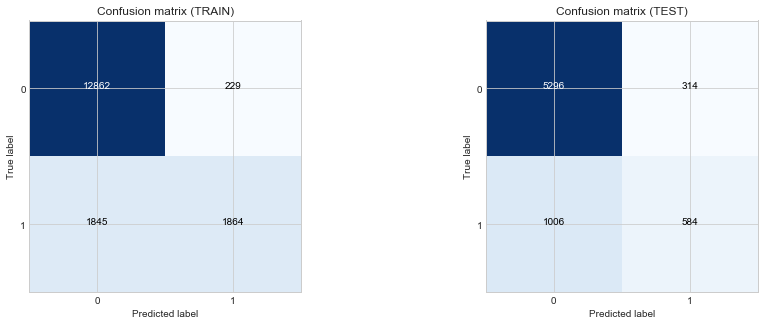

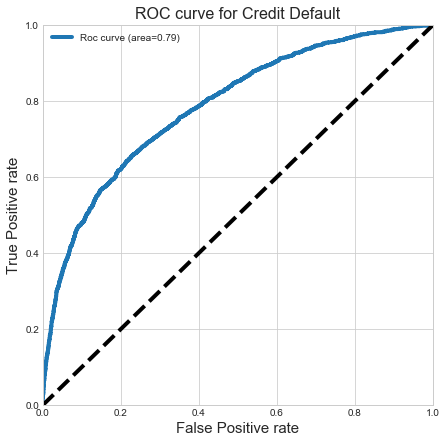

In [181]:
gb = GradientBoostingClassifier(learning_rate= 0.02, max_depth= 7,n_estimators=300, max_features = 0.9,min_samples_leaf = 5)
model_gb = model(gb, x_train, y_train,x_test, y_test)

In [88]:
#ABOUT ROC curve
#An ROC curve is the most commonly used way to visualize the performance of a  classifier, 
#AUC is (arguably) the best way to summarize its performance in a single number.
#As such, gaining a deep understanding of ROC curves and AUC is beneficial for data scientists, machine learning practitioners, 
#medical researchers (among others).



In [89]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
x_up = df_upsampled.drop(['DEFAULTER'],axis = 1)
y_up = df_upsampled.DEFAULTER

# rescale the metrics to the same mean and standard deviation
scaler = preprocessing.StandardScaler()
x = scaler.fit(x).transform(x)

# Further divide the train data into train test split 70% & 30% respectively
x_train_up, x_test_up, y_train_up, y_test_up = train_test_split(x_up, y_up, test_size=0.1, stratify=y, random_state=2)

In [90]:
df_test_up=x_test_up.join(y_test_up)
df_test_up.head()

,LIMIT_BAL,SEX,AGE,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,out_bucket,gender_marital,AgeBin,gender_agebin,Closeness_5,out_bal_apr,out_bal_may,out_bal_june,out_bal_july,out_bal_aug,Closeness_4,Closeness_3,Closeness_2,Closeness_1,DEFAULTER
4,50000.0,1.0,57.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,6,1,4,4,0.617080,704.0,11498.0,36393.0,42909.0,47856.0,0.581200,0.283300,0.886600,0.827660,0.0
8,140000.0,2.0,28.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,5,4,1,6,0.915764,9074.0,10492.0,10821.0,12809.0,13327.0,0.912779,0.913514,0.899314,0.919393,0.0
20,130000.0,2.0,39.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,38358.0,27688.0,24489.0,20616.0,11802.0,930.0,3000.0,1537.0,1000.0,2000.0,930.0,33764.0,6,5,2,7,0.909215,11802.0,22616.0,27489.0,32225.0,45895.0,0.841415,0.811623,0.787015,0.704938,0.0
24,90000.0,1.0,23.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4744.0,7070.0,0.0,5398.0,6360.0,8292.0,5757.0,0.0,5398.0,1200.0,2045.0,2000.0,5,2,1,1,0.929333,113.0,351.0,351.0,7421.0,10852.0,0.940022,1.000000,0.921444,0.947289,0.0
32,100000.0,1.0,32.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,93036.0,84071.0,82880.0,80958.0,78703.0,75589.0,3023.0,3511.0,3302.0,3204.0,3200.0,2504.0,6,2,2,2,0.212970,6314.0,11773.0,16997.0,21699.0,33687.0,0.190420,0.171200,0.159290,0.069640,0.0


In [91]:
print(x_train_up.shape)
print(x_test_up.shape)
print(y_train_up.shape)
print(y_test_up.shape)

(21600, 37)
(2400, 37)
(21600,)
(2400,)


In [92]:
from sklearn import tree
clfs = {

'RandomForest': RandomForestClassifier(),

'GradientBoosting': GradientBoostingClassifier(),
}


In [220]:
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train_up,y_train_up)
    y_pred = clf.predict(x_test_up)
    y_score = clf.score(x_test_up,y_test_up)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test_up, y_pred),
                     'Recall_score': metrics.recall_score(y_test_up, y_pred),
                     'F1_score': metrics.f1_score(y_test_up, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test_up, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,RandomForest,0.812081,0.684906,0.743091,0.895417
1,GradientBoosting,0.704545,0.409434,0.517900,0.831667


In [93]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import f1_score


In [94]:
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'], 'n_jobs' : [-1]}

In [95]:
acc_scorer = make_scorer(f1_score)

In [96]:
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)

In [97]:

def forest(model, params,x_train, x_test, y_train, y_test, kfold):
    grid_forest= GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=kfold)
    grid_forest.fit(x_train, y_train)
    print ('Best params: ', grid_forest.best_params_)
    print ('Best AUC on Train set: ', grid_forest.best_score_)
    print ('Best AUC on Test set: ', grid_forest.score(x_test, y_test))

In [98]:
def confmat_forest(pred, y_test):
    conmat = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    conf = pd.DataFrame(conmat, index=['Defaulter', 'Not Defaulter'],
                             columns=['Predicted Defaulter', 'Predicted Not Defaulter'])
    print(conf)

In [99]:
def roc_forest(prob, y_test):
    y_score = prob
    fpr = dict()
    tpr = dict()
    

    
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])
    plt.figure(figsize=[7,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive rate', fontsize=15)
    plt.ylabel('True Positive rate', fontsize=15)
    plt.title('ROC curve for Credit Default', fontsize=16)
    plt.legend(loc='Lower Right')
    plt.show()

In [100]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix
def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

In [101]:
def model_rd(md, x_train, y_train,x_test, y_test):
    md.fit(x_train, y_train)
    pred = md.predict(x_test)
    prob = md.predict_proba(x_test)[:,1]
    print (' ') 
    print ('Accuracy on Train set: ', md.score(x_train, y_train))
    print ('Accuracy on Test set: ', md.score(x_test, y_test))
    print (' ')
    print(classification_report(y_test, pred))
    print (' ')
    print ('Confusion Matrix')
    confmat_forest(pred, y_test)
    print(' ')
    print('ACCURACY: ', accuracy_score(y_test, pred),' or ',round(accuracy_score(y_test, pred)*100,2),'%')
    threshold = 0.5
    y_train_pred = md.predict_proba(x_train)[:,1]
    

    fig,ax = plt.subplots(1,2)
    fig.set_size_inches(15,5)

    plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
    plot_cm(ax[1],  y_test, prob,   [0,1], 'Confusion matrix (TEST)', threshold)
    roc_forest(prob, y_test)
    return md

In [102]:
#Building the model using random forest


 
Accuracy on Train set:  0.9996296296296296
Accuracy on Test set:  0.9075
 
             precision    recall  f1-score   support

        0.0       0.93      0.96      0.94      1870
        1.0       0.82      0.74      0.78       530

avg / total       0.91      0.91      0.91      2400

 
Confusion Matrix
               Predicted Defaulter  Predicted Not Defaulter
Defaulter                      391                      139
Not Defaulter                   83                     1787
 
ACCURACY:  0.9075  or  90.75 %


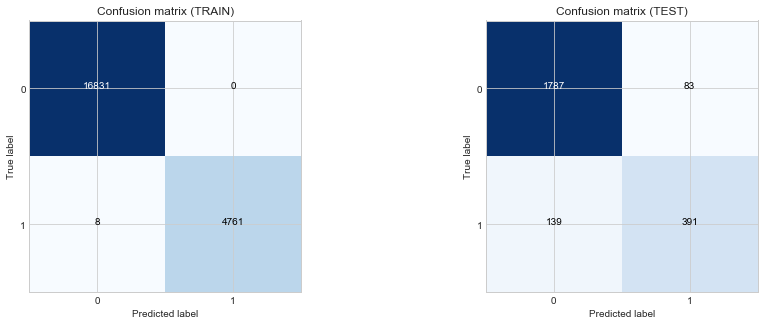

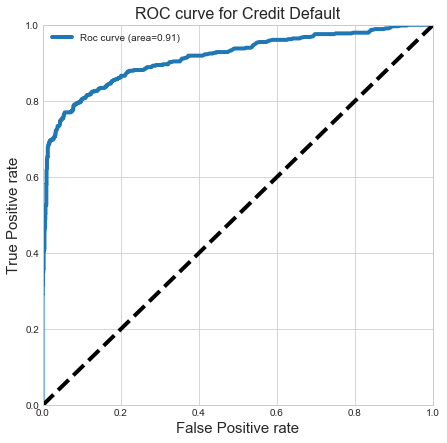

In [140]:

#rf = RandomForestClassifier(max_depth=7,n_estimators=300,max_features=0.9,min_samples_leaf=5)
rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_split=0.0001,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=600, verbose=0,
            warm_start=False)
rf.fit(x_train_up,y_train_up)

model_rf = model_rd(rf, x_train_up, y_train_up,x_test_up, y_test_up)

In [103]:
print (np.array(x_train_up)[:,0])

[310000.  20000. 360000. ... 400000. 290000.  10000.]


In [104]:
#We got an accuracy of 91.08% using random forest upsampled data.

In [105]:

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout


In [106]:
input_dim = x_train_up.shape[1]

model = Sequential()
model.add(Dense(256, input_shape=(input_dim,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1,  activation='sigmoid'))

In [107]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [108]:
from keras.callbacks import Callback

class BatchLogger(Callback):
    def on_train_begin(self, epoch, logs={}):
        self.log_values = {}
        for k in self.params['metrics']:
            self.log_values[k] = []

    def on_epoch_end(self, batch, logs={}):
        for k in self.params['metrics']:
            if k in logs:
                self.log_values[k].append(logs[k])
    
    def get_values(self, metric_name, window):
        d =  pd.Series(self.log_values[metric_name])
        return d.rolling(window,center=False).mean()

bl = BatchLogger()

In [109]:

history = model.fit(
              np.array(x_train_up), np.array(y_train_up),
              batch_size=25, epochs=5, verbose=1, callbacks=[bl],
              validation_data=(np.array(x_test_up), np.array(y_test_up)))

Train on 21600 samples, validate on 2400 samples
Epoch 1/5
21600/21600 [==============================] - 9s 401us/step - loss: 0.5411 - acc: 0.7788 - val_loss: 0.5281 - val_acc: 0.7792
Epoch 2/5
21600/21600 [==============================] - 3s 139us/step - loss: 0.5281 - acc: 0.7792 - val_loss: 0.5280 - val_acc: 0.7792
Epoch 3/5
21600/21600 [==============================] - 3s 127us/step - loss: 0.5281 - acc: 0.7792 - val_loss: 0.5280 - val_acc: 0.7792
Epoch 4/5
21600/21600 [==============================] - 3s 128us/step - loss: 0.5279 - acc: 0.7792 - val_loss: 0.5283 - val_acc: 0.7792
Epoch 5/5
21600/21600 [==============================] - 3s 127us/step - loss: 0.5281 - acc: 0.7792 - val_loss: 0.5282 - val_acc: 0.7792


In [110]:

score = model.evaluate(np.array(x_test_up), np.array(y_test_up), verbose=0)
print('Test log loss:', score[0])
print('Test accuracy:', score[1])

Test log loss: 0.5281682038307189
Test accuracy: 0.7791666666666667


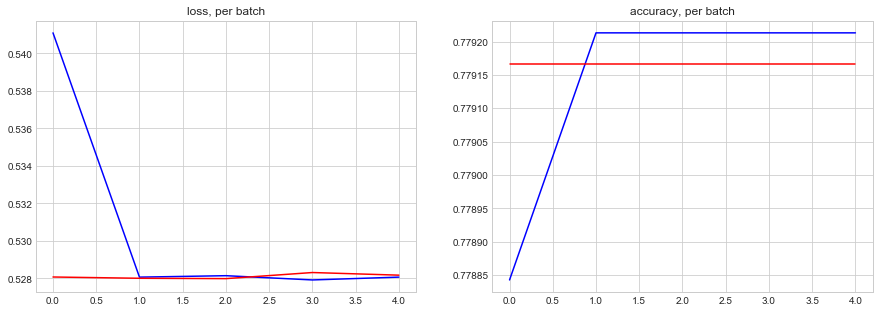

In [111]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(bl.get_values('loss',1), 'b-', label='train');
plt.plot(bl.get_values('val_loss',1), 'r-', label='test');

plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(bl.get_values('acc',1), 'b-', label='train');
plt.plot(bl.get_values('val_acc',1), 'r-', label='test');
plt.show()

In [141]:
model_rf = Sequential()
model_rf.add(Dense(256, input_shape=(input_dim,), activation='relu', weights=model.layers[0].get_weights()))
model_rf.add(Dense(256, activation='relu', weights=model.layers[1].get_weights()))
model_rf.add(Dense(64, activation='relu', weights=model.layers[2].get_weights()))
model_rf.add(Dense(64, activation='relu', weights=model.layers[3].get_weights()))
model_rf.add(Dense(10, activation='sigmoid', weights=model.layers[4].get_weights()))

In [142]:
activations = model_rf.predict_on_batch(np.array(x_test_up))


In [143]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=25, verbose=0, n_iter=500, random_state=1337)
model_rf = tsne.fit_transform(activations)

In [144]:
print(samples)

[[ -7.9761605  -1.5505514]
 [  7.4123435 -14.380793 ]
 [ -7.97407    -1.5557525]
 ...
 [ -7.9774914  -1.5702457]
 [ -7.976891   -1.551033 ]
 [  9.015923    4.556324 ]]


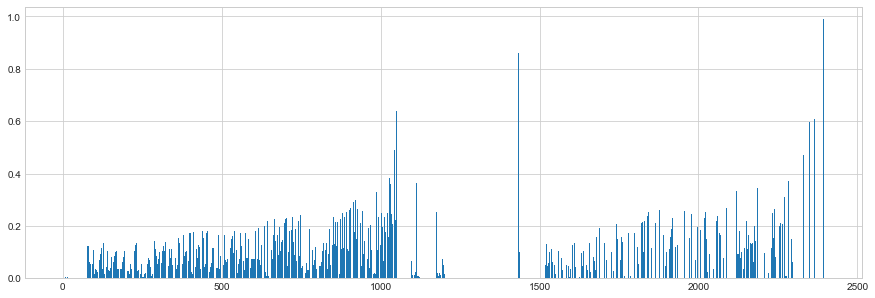

In [159]:
from pyclustering.cluster.optics import optics

# Create OPTICS algorithm for cluster analysis
optics_instance = optics(samples, 1, 3, 100);

# Run cluster analysis
optics_instance.process();
 
# Obtain results of clustering
clusters = optics_instance.get_clusters();

y_train_pred = model.predict_on_batch(np.array(x_train_up))[:,0]
y_test_pred = model.predict_on_batch(np.array(x_test_up))[:,0]

pred  = (y_test_pred>0.5).astype(int)
truth = (y_test>0.5).values.astype(int)

avg = y_test.mean()

cluster_defaulting_data = [ 
    [ 
        len(cl) , 
        truth[cl].mean(), 
        pred[cl].mean(),
        max(np.bincount(truth[cl])/len(truth[cl])),
        max(np.bincount(pred[cl])/len(pred[cl])),
        truth[cl].mean()/avg,
        pred[cl].mean()/avg,
        accuracy_score(truth[cl], pred[cl]),
        f1_score(truth[cl], pred[cl]),
        precision_score(truth[cl], pred[cl]),
        recall_score(truth[cl], pred[cl])
    ] for cl in clusters ]

noise = optics_instance.get_noise();

# Obtain rechability-distances
ordering = optics_instance.get_ordering();

# Visualization of cluster ordering in line with reachability distance.
indexes = [i for i in range(0, len(ordering))];

fig = plt.figure()
fig.set_size_inches(15,5)
plt.bar(indexes, ordering);
plt.show();

In [146]:

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score



columns=[
    'count', 
    'rate_truth', 
    'rate_pred', 
    'purity_truth', 
    'purity_pred', 
    'lift_truth', 
    'lift_pred', 
    'accuracy', 
    'f1', 
    'precision', 
    'recall']

cl_df = pd.DataFrame(cluster_defaulting_data, columns=columns)

In [147]:
cl_df.shape

(99, 11)

In [148]:
sel = ((cl_df['f1']>0.7) | (cl_df['accuracy']>0.82))
clusters_topsel = cl_df[sel]
clusters_topsel.sample(20)

,count,rate_truth,rate_pred,purity_truth,purity_pred,lift_truth,lift_pred,accuracy,f1,precision,recall
33,13,0.076923,0.0,0.923077,1.0,0.348331,0.0,0.923077,0.0,0.0,0.0
56,4,0.000000,0.0,1.000000,1.0,0.000000,0.0,1.000000,0.0,0.0,0.0
28,9,0.000000,0.0,1.000000,1.0,0.000000,0.0,1.000000,0.0,0.0,0.0
7,8,0.125000,0.0,0.875000,1.0,0.566038,0.0,0.875000,0.0,0.0,0.0
63,4,0.000000,0.0,1.000000,1.0,0.000000,0.0,1.000000,0.0,0.0,0.0
15,5,0.000000,0.0,1.000000,1.0,0.000000,0.0,1.000000,0.0,0.0,0.0
67,4,0.000000,0.0,1.000000,1.0,0.000000,0.0,1.000000,0.0,0.0,0.0
54,8,0.000000,0.0,1.000000,1.0,0.000000,0.0,1.000000,0.0,0.0,0.0
73,4,0.000000,0.0,1.000000,1.0,0.000000,0.0,1.000000,0.0,0.0,0.0
91,5,0.000000,0.0,1.000000,1.0,0.000000,0.0,1.000000,0.0,0.0,0.0


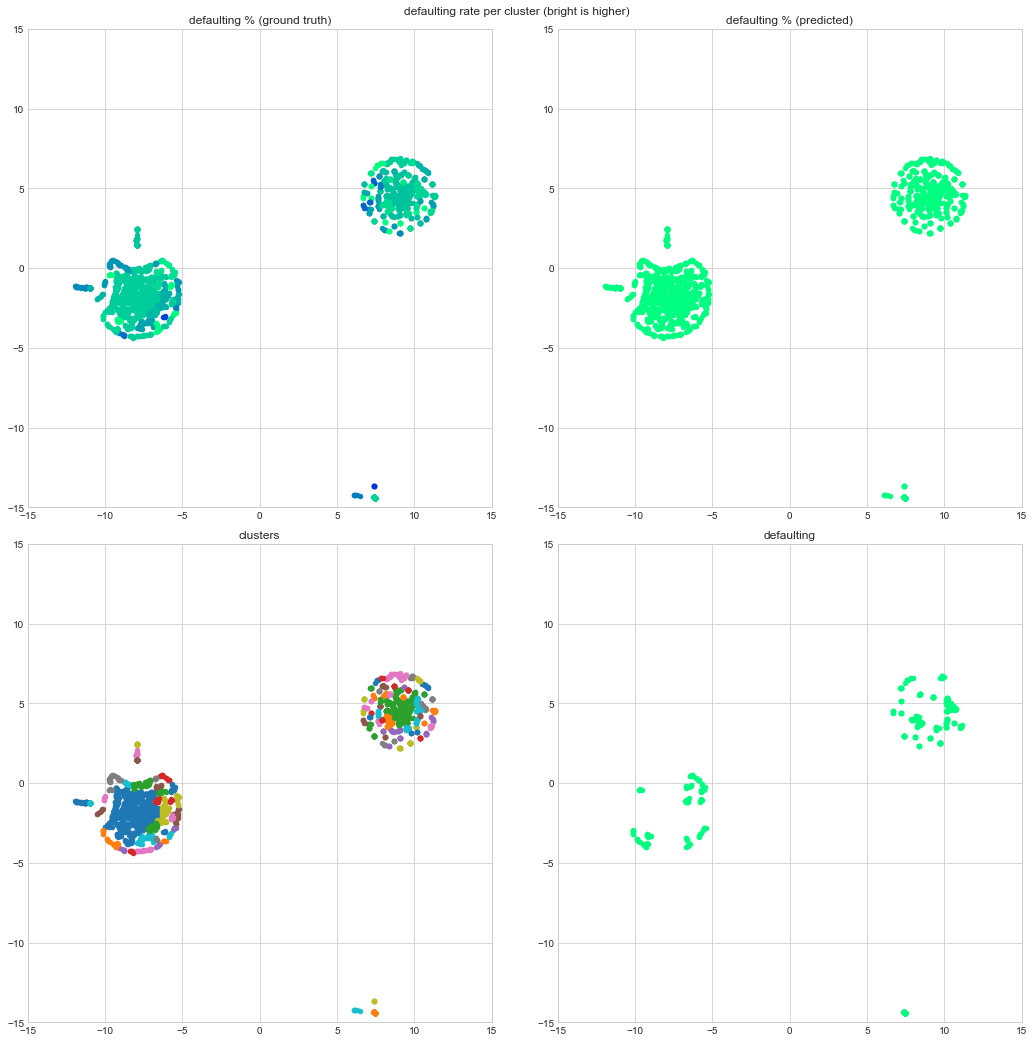

In [158]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches(15,15)

cmap = plt.cm.winter_r
color_true = cl_df['rate_truth'].apply(cmap)
color_pred = cl_df['rate_pred'].apply(cmap)

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].set_xlim([-15, 15])
        ax[i,j].set_ylim([-15, 15])

for i in range(len(clusters)):
    d = samples[clusters[i],:]
    
    ax[0,0].scatter(d[:,0], d[:,1], s=20, color=color_true[i])
    ax[0,1].scatter(d[:,0], d[:,1], s=20, color=color_pred[i])

    ax[1,0].scatter(d[:,0], d[:,1], s=20)
    if i in clusters_topsel.index:
        ax[1,1].scatter(d[:,0], d[:,1], s=20, color=color_pred[i])

fig.suptitle("defaulting rate per cluster (bright is higher)")

ax[0,0].set_title("defaulting % (ground truth)")
ax[0,1].set_title("defaulting % (predicted)")

ax[1,0].set_title('clusters')
ax[1,1].set_title('defaulting')

plt.tight_layout(pad=3, w_pad=4, h_pad=1.0)
plt.show()

In [105]:
#exporting the result in excel format

In [106]:
df_test_up['PREDICTED_STATUS']=np.int_(model_gb.predict(df_test_up.drop(['DEFAULTER'],axis = 1)))
df_test_up.index.names = ['ID']

In [107]:
df_test_up['PREDICTED_STATUS'].to_csv("default_predication_test.csv")